In [1]:
from collections import namedtuple
from itertools import product

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch_geometric.datasets import UPFD
from torch_geometric.loader import DataLoader
from tqdm.notebook import tqdm
from box import Box

from models import UPFDNet, UPFDSingle, MultiFeatureNet, ParallelFeatureNet
from dataset import MultiFeatureDataset, get_data
from utils import train, validate, test, train_multi, validate_multi, test_multi

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
config = Box({
    'batch_size': 128,
    'epochs': 35,
    'lr': 1e-2,
    'l2': 1e-2,
    'hidden_dim': 128,
    'dropout': 0.2,
})

In [4]:
Result = namedtuple('Result', ['name', 'feature', 'conv_layer', 'accuracy', 'recall', 'precision', 'f1', 'roc_auc', 'train_mean', 'train_std', 'val_mean', 'val_std'])

# UPFDNet Experiments

In [6]:
names = ['politifact', 'gossipcop']
features = ['content', 'bert', 'profile', 'spacy']
root = './datasets/UPFD'

conv_layers = ['gcn', 'sage', 'gat', 'parma']
combinations = list(product(names, features, conv_layers))

In [14]:
results = []

for name, feature, conv_layer in tqdm(combinations, desc=f"Combination"):
    train_dataset = UPFD(root=root, name=name, feature=feature, split='train')
    val_dataset = UPFD(root=root, name=name, feature=feature, split='val')
    test_dataset = UPFD(root=root, name=name, feature=feature, split='test')
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=False)
    
    model = UPFDNet(conv_layer=conv_layer, 
                    in_dim=train_dataset.num_features, 
                    hidden_dim=config.hidden_dim, 
                    out_dim=train_dataset.num_classes, 
                    concat=True, 
                    dropout=config.dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.l2)
    
    train_losses = []
    val_losses = []

    for epoch in tqdm(range(config.epochs), desc=f"Training"):
        train_loss = train(model, optimizer, train_loader, device)
        train_losses.append(train_loss)
        
        val_loss = validate(model, val_loader, device)
        val_losses.append(val_loss)
    
    acc, recall, precision, f1, roc_auc = test(model, test_loader, device)
    train_mean, train_std = np.mean(train_losses), np.std(train_losses)
    val_mean, val_std = np.mean(val_losses), np.std(val_losses)
    
    curr_result = Result(name=name, feature=feature, conv_layer=conv_layer, accuracy=acc, recall=recall, precision=precision, f1=f1, roc_auc=roc_auc, train_mean=train_mean, train_std=train_std, val_mean=val_mean, val_std=val_std)
    results.append(curr_result)

Combination:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
sorted(results, key=lambda x: x.accuracy, reverse=True)

[Result(name='gossipcop', feature='bert', conv_layer='gat', accuracy=0.9712493465760585, recall=0.9843423799582464, precision=0.9593082400813835, f1=0.9716640906749099, roc_auc=0.9712287816021598, train_mean=0.17959162910424528, train_std=0.15349548132782626, val_mean=0.16300149816487516, val_std=0.10228823092800876),
 Result(name='gossipcop', feature='content', conv_layer='gat', accuracy=0.9704652378463147, recall=0.9718162839248434, precision=0.9692868297761582, f1=0.9705499087829033, roc_auc=0.9704631157844112, train_mean=0.34971898498516235, train_std=0.22986923118793354, val_mean=0.4036705976298877, val_std=0.3057976346385656),
 Result(name='gossipcop', feature='spacy', conv_layer='sage', accuracy=0.9594877156299007, recall=0.9749478079331941, precision=0.9458227848101266, f1=0.9601644821382678, roc_auc=0.9594634327624085, train_mean=0.16922509968280788, train_std=0.08094152873981139, val_mean=0.1643242149693625, val_std=0.04787288909330626),
 Result(name='gossipcop', feature='spa

In [16]:
df = pd.DataFrame(results)
df.to_csv('./results/upfdnet.csv')

# UPFDSingle

In [8]:
results = []

for name, feature, conv_layer in tqdm(combinations, desc=f"Combination"):
    train_dataset = UPFD(root=root, name=name, feature=feature, split='train')
    val_dataset = UPFD(root=root, name=name, feature=feature, split='val')
    test_dataset = UPFD(root=root, name=name, feature=feature, split='test')
    
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=False)
    
    model = UPFDSingle(conv_layer=conv_layer,
                       feature_type=feature,
                       hidden_dim=config.hidden_dim,
                       out_dim=train_dataset.num_classes,
                       dropout=config.dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.l2)
    
    train_losses = []
    val_losses = []

    for epoch in tqdm(range(config.epochs), desc=f"Training"):
        train_loss = train(model, optimizer, train_loader, device)
        train_losses.append(train_loss)
        
        val_loss = validate(model, val_loader, device)
        val_losses.append(val_loss)
    
    acc, recall, precision, f1, roc_auc = test(model, test_loader, device)
    train_mean, train_std = np.mean(train_losses), np.std(train_losses)
    val_mean, val_std = np.mean(val_losses), np.std(val_losses)
    
    curr_result = Result(name=name, feature=feature, conv_layer=conv_layer, accuracy=acc, recall=recall, precision=precision, f1=f1, roc_auc=roc_auc, train_mean=train_mean, train_std=train_std, val_mean=val_mean, val_std=val_std)
    results.append(curr_result)

Combination:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
sorted(results, key=lambda x: x.accuracy, reverse=True)

[Result(name='gossipcop', feature='bert', conv_layer='sage', accuracy=0.9200209095661265, recall=0.8856993736951984, precision=0.9512331838565022, f1=0.9172972972972973, roc_auc=0.9200748177376515, train_mean=0.2806287944316864, train_std=0.14643214700373366, val_mean=0.3115823488576071, val_std=0.15179567050754755),
 Result(name='politifact', feature='bert', conv_layer='sage', accuracy=0.8506787330316742, recall=0.8053097345132744, precision=0.8921568627450981, f1=0.8465116279069768, roc_auc=0.8517289413307112, train_mean=0.4347477258316108, train_std=0.3929888855687816, val_mean=0.7028023089681353, val_std=0.4243867763725416),
 Result(name='gossipcop', feature='profile', conv_layer='sage', accuracy=0.8450078410872974, recall=0.7494780793319415, precision=0.9270497094899935, f1=0.8288600288600289, roc_auc=0.8451578878335101, train_mean=0.37191542623535034, train_std=0.07414280586626927, val_mean=0.3596481594017574, val_std=0.06108850175468383),
 Result(name='politifact', feature='bert

In [10]:
df = pd.DataFrame(results)
df.to_csv('./results/upfdsingle.csv')

# Multi Feature 

In [14]:
results = []

for name, conv_layer in tqdm(list(product(names, conv_layers)), desc="Combinations"):
    train_multidataset = MultiFeatureDataset(name=name, split='train')
    val_multidataset = MultiFeatureDataset(name=name, split='val')
    test_multidataset = MultiFeatureDataset(name=name, split='test')
    
    multi_trainloader = DataLoader(train_multidataset, batch_size=config.batch_size, shuffle=True)
    multi_valloader = DataLoader(val_multidataset, batch_size=config.batch_size, shuffle=False)
    multi_testloader = DataLoader(test_multidataset, batch_size=config.batch_size, shuffle=False)
    
    
    model = MultiFeatureNet(conv_layer, hidden_dim=config.hidden_dim, out_dim=train_dataset.num_classes, dropout=0.2).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.l2)   

    train_losses = []
    val_losses = []

    for epoch in tqdm(range(config.epochs), desc=f"Training"):
        train_loss = train_multi(model, optimizer, multi_trainloader, device)
        train_losses.append(train_loss)
        
        val_loss = validate_multi(model, multi_valloader, device)
        val_losses.append(val_loss)
    
    acc, recall, precision, f1, roc_auc = test_multi(model, multi_testloader, device)
    train_mean, train_std = np.mean(train_losses), np.std(train_losses)
    val_mean, val_std = np.mean(val_losses), np.std(val_losses)
    
    curr_result = Result(name=name, feature='all', conv_layer=conv_layer, accuracy=acc, recall=recall, precision=precision, f1=f1, roc_auc=roc_auc, train_mean=train_mean, train_std=train_std, val_mean=val_mean, val_std=val_std)
    results.append(curr_result)

Combinations:   0%|          | 0/8 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
sorted(results, key=lambda x: x.accuracy, reverse=True)

[Result(name='gossipcop', feature='all', conv_layer='sage', accuracy=0.7592786199686357, recall=0.8053235908141962, precision=0.7379244380679101, f1=0.7701522335912153, roc_auc=0.759206298024899, train_mean=0.5407183195863451, train_std=0.0507460823652482, val_mean=0.5011371844155448, val_std=0.06316851060115006),
 Result(name='politifact', feature='all', conv_layer='gat', accuracy=0.751131221719457, recall=0.5752212389380531, precision=0.9027777777777778, f1=0.7027027027027027, roc_auc=0.7552032120616192, train_mean=0.744496431521007, train_std=0.619081361922645, val_mean=0.8402942367962428, val_std=0.7915601213116749),
 Result(name='politifact', feature='all', conv_layer='gcn', accuracy=0.6968325791855203, recall=0.46017699115044247, precision=0.896551724137931, f1=0.6081871345029239, roc_auc=0.7023107177974435, train_mean=0.48886874456490786, train_std=0.21921503384960464, val_mean=0.7297115640980857, val_std=0.2370928726008481),
 Result(name='gossipcop', feature='all', conv_layer='

In [16]:
df = pd.DataFrame(results)
df.to_csv('./results/multifeature.csv')

# Parallel Feature

In [17]:
results = []

for name, conv_layer in tqdm(list(product(names, conv_layers)), desc="Combinations"):
    train_multidataset = MultiFeatureDataset(name=name, split='train')
    val_multidataset = MultiFeatureDataset(name=name, split='val')
    test_multidataset = MultiFeatureDataset(name=name, split='test')
    
    multi_trainloader = DataLoader(train_multidataset, batch_size=config.batch_size, shuffle=True)
    multi_valloader = DataLoader(val_multidataset, batch_size=config.batch_size, shuffle=False)
    multi_testloader = DataLoader(test_multidataset, batch_size=config.batch_size, shuffle=False)
    
    
    model = ParallelFeatureNet(conv_layer, hidden_dim=config.hidden_dim, out_dim=train_dataset.num_classes, dropout=0.2).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.l2)   

    train_losses = []
    val_losses = []

    for epoch in tqdm(range(config.epochs), desc=f"Training"):
        train_loss = train_multi(model, optimizer, multi_trainloader, device)
        train_losses.append(train_loss)
        
        val_loss = validate_multi(model, multi_valloader, device)
        val_losses.append(val_loss)
    
    acc, recall, precision, f1, roc_auc = test_multi(model, multi_testloader, device)
    train_mean, train_std = np.mean(train_losses), np.std(train_losses)
    val_mean, val_std = np.mean(val_losses), np.std(val_losses)
    
    curr_result = Result(name=name, feature='all', conv_layer=conv_layer, accuracy=acc, recall=recall, precision=precision, f1=f1, roc_auc=roc_auc, train_mean=train_mean, train_std=train_std, val_mean=val_mean, val_std=val_std)
    results.append(curr_result)

Combinations:   0%|          | 0/8 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/35 [00:00<?, ?it/s]

/home/baimyrza/programming/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
sorted(results, key=lambda x: x.accuracy, reverse=True)

[Result(name='politifact', feature='all', conv_layer='sage', accuracy=0.7692307692307693, recall=0.6371681415929203, precision=0.8780487804878049, f1=0.7384615384615385, roc_auc=0.772287774500164, train_mean=1.2000688893454416, train_std=1.4903521870241543, val_mean=1.3379046729632786, val_std=1.7984277389018914),
 Result(name='politifact', feature='all', conv_layer='gcn', accuracy=0.6018099547511312, recall=0.8938053097345132, precision=0.5706214689265536, f1=0.696551724137931, roc_auc=0.5950508030154047, train_mean=0.881209545476096, train_std=0.6335430839043686, val_mean=0.9622385025024414, val_std=0.8380628585800765),
 Result(name='politifact', feature='all', conv_layer='parma', accuracy=0.5113122171945701, recall=1.0, precision=0.5113122171945701, f1=0.6766467065868264, roc_auc=0.5, train_mean=125.87504826273236, train_std=480.867658269054, val_mean=105.87432394538607, val_std=348.42740852896355),
 Result(name='gossipcop', feature='all', conv_layer='gcn', accuracy=0.50078410872974

In [19]:
df = pd.DataFrame(results)
df.to_csv('./results/parallelfeature.csv')

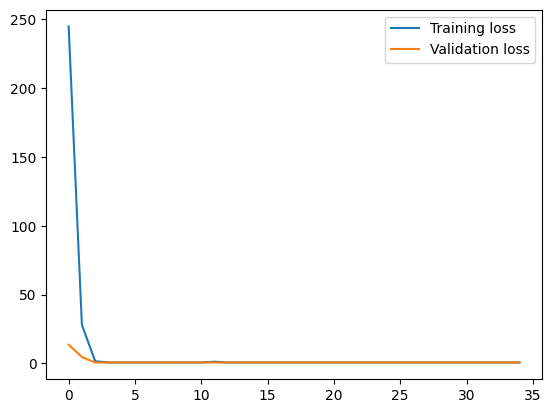

In [20]:
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.show()

In [54]:
acc

0.8280542986425339

In [55]:
train_mean, train_std

(0.49801126388566835, 0.29401728592845217)

In [56]:
val_mean, val_std

(0.7081863735403333, 0.3099566150502918)

In [57]:
{
    'UPFD':
        {
            'politifact':
                {
                    'content': {'acc': 0.8371040723981901, 'train': (0.21658988339560373, 0.2518452964355867), 'val': (0.7395437632288252, 0.49123788307972366)},
                    'bert': {'acc': 0.832579185520362, 'train': (0.2749710392872138, 0.34807777323202527), 'val': (0.7395437632288252, 0.49123788307972366)},
                    'profile': {'acc': 0.7330316742081447, 'train': (0.15560164621898107, 0.019322814165847656), 'val': (0.8312698517526899, 0.03892493826803987)},
                    'spacy': {'acc': 0.7963800904977375, 'train': (0.2683595911732742, 0.22351313797481065), 'val': (0.5542327957493919, 0.10418085728613392)},
                },
            'gossipcop':
                {
                    'content': {'acc':, 'train':, 'val':},
                    'bert': {'acc':, 'train':, 'val':},
                    'profile': {'acc':, 'train':, 'val':},
                }
        },
    'UPFDSingle':
        {
            'politifact':
                {
                    'content': {'acc': 0.48868778280542985, 'train': (0.6910342659269061, 0.08080960685746265), 'val': (0.7469416328838894, 0.14379042237940715)},
                    'bert': {'acc': 0.8144796380090498, 'train': (0.49281267342822893, 0.3303455689609338), 'val': (0.6759281899247851, 0.3384613583742951)},
                    'profile': {'acc': 0.7692307692307693, 'train': (0.4531328294958387, 0.13431287229205577), 'val': (0.7562623126166207, 0.07385509674480792)},
                    'spacy': {'acc': 0.755656108597285, 'train': (0.45739116839000155, 0.1673643230909156), 'val': (0.5801735316004072, 0.12114230152071757)},
                }
        },
    'ParallelFeature':
        {
            'politifact':
                {
                    'all': {'acc': 0.5520361990950227, 'train': (0.9119835887636457, 0.6528642094886239), 'val': (0.9711397647857666, 0.7514087358902359)}
                }
        },
    'MultiFeature':
        {
            'politifact':
                {
                    'all': {'acc': 0.8280542986425339, 'train': (0.49801126388566835, 0.29401728592845217), 'val': (0.7081863735403333, 0.3099566150502918)}
                }
        }
}

{'UPFD': {'politifact': {'content': {'acc': 0.8371040723981901,
    'train': (0.21658988339560373, 0.2518452964355867),
    'val': (0.7395437632288252, 0.49123788307972366)},
   'bert': {'acc': 0.832579185520362,
    'train': (0.2749710392872138, 0.34807777323202527),
    'val': (0.7395437632288252, 0.49123788307972366)},
   'profile': {'acc': 0.7330316742081447,
    'train': (0.15560164621898107, 0.019322814165847656),
    'val': (0.8312698517526899, 0.03892493826803987)},
   'spacy': {'acc': 0.7963800904977375,
    'train': (0.2683595911732742, 0.22351313797481065),
    'val': (0.5542327957493919, 0.10418085728613392)}}},
 'UPFDSingle': {'politifact': {'content': {'acc': 0.48868778280542985,
    'train': (0.6910342659269061, 0.08080960685746265),
    'val': (0.7469416328838894, 0.14379042237940715)},
   'bert': {'acc': 0.8144796380090498,
    'train': (0.49281267342822893, 0.3303455689609338),
    'val': (0.6759281899247851, 0.3384613583742951)},
   'profile': {'acc': 0.7692307692307